In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.
    
    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.
        
    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    
    # RETURN A VECTOR
    norm = np.abs(alpha**2)+np.abs(beta**2)
    return np.array([alpha/norm, beta/norm], requires_grad=False)

In [ ]:
alpha = 2.0 + 1.0j
beta = -0.3 + 0.4j 
normalize_state(alpha, beta)

tensor([ 0.38095238+0.19047619j, -0.05714286+0.07619048j], requires_grad=False)

In [ ]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.
    
    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector
        
    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """
 
    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    return  sum([np.conjugate(a)*b for a, b in zip(state_1, state_2)])


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


In [6]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector. 
        num_meas (int): The number of measurements to take
        
    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability 
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    
    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
 
    return np.random.choice([0, 1], size=num_meas, p=[np.abs(c)**2 for c in state])


In [9]:
state = np.array([0.6j, 0.8])
measure_state(state, 10)

tensor([1, 1, 0, 0, 0, 1, 0, 1, 1, 0], requires_grad=True)

In [11]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (array[complex]): A normalized quantum state vector. 
        
    Returns:
        array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return U@state
apply_u(state)

tensor([ 0.56568542+0.42426407j, -0.56568542+0.42426407j], requires_grad=True)

In [12]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>   
    return np.array([1, 0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """
    state = initialize_state()
    state = apply_u(state)
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    return measure_state(state, 100)


In [13]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    
    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()
apply_u()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

In [ ]:
def func(normal_arg, unused_arg):
    print(normal_arg)
    
var = 5



/home/amir/miniconda3/envs/pennylane/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


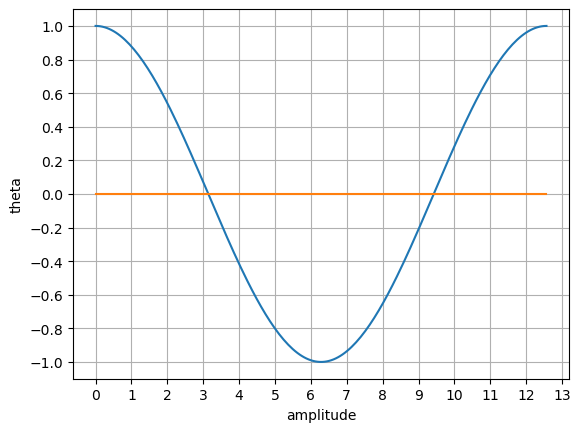

In [36]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires=0)
    
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

# plt.figure(figsize=(12, 9))
plot = plt.plot(angles, output_states)
plt.grid(True)
plt.xlabel("amplitude")
plt.ylabel("theta")
plt.locator_params(axis='x', nbins=14, tight=True)
plt.locator_params(axis='y', nbins=12, tight=True)


In [48]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = 0, -np.pi/2, np.pi

@qml.qnode(dev)
def hadamard_with_rz_rx(state):
    if state:
        qml.PauliX(wires=0)
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

print(hadamard_with_rz_rx(0)*(np.exp(1j*(phi+omega)/2)))
print(hadamard_with_rz_rx(1)*(np.exp(1j*(phi+omega)/2)))

[ 7.07106781e-01+0.j         -8.65956056e-17-0.70710678j]
[ 0.        +7.07106781e-01j -0.70710678+8.65956056e-17j]


In [4]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.T(wires=0)
    return qml.state()
prepare_state()

tensor([ 0.70710678+0.j , -0.5       -0.5j], requires_grad=True)

In [2]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3, wires=0)
    return qml.state()
prepare_state()

tensor([0.8660254+0.j , 0.       -0.5j], requires_grad=True)

In [5]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE


# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state_vector=state, wires=[0])
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy='device')(v))


[0.49365933-0.24166034j 0.75032489+0.36730546j]

0: ──RY(1.98)──RZ(0.91)─┤  State


In [ ]:
##################
# YOUR CODE HERE #
##################
state = [0.5, 1j*np.sqrt(3)/2]
# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.MottonenStatePreparation(state_vector=state, wires=[0])



# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
ypym = np.array([1, 1j, 1, -1j])/np.sqrt(2), 
def y_basis_rotation():
    
    qml.adjoint(qml.S(wires=0))
    qml.adjoint(qml.Hadamard(wires=0))




In [11]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare(state):
    if state:
        qml.PauliX(wires=0)
        
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    return qml.state()

prepare(False), prepare(True)

(tensor([0.70710678+0.j        , 0.        +0.70710678j], requires_grad=True),
 tensor([ 0.70710678+0.j        , -0.        -0.70710678j], requires_grad=True))

In [13]:

# An array to store your results
shot_results = []

def count():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.expval(qml.PauliY(0))

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values: 
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device("default.qubit", wires=1, shots=shots)
    
    circuit = qml.QNode(count, dev)
    shot_results.append(circuit())
            
    # STORE RESULT IN SHOT_RESULTS ARRAY
    

print(qml.math.unwrap(shot_results))


[-0.74, -0.664, -0.7044, -0.7089, -0.709092]


In [16]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)


    return qml.sample(qml.PauliY(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of 
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1. 
    
    Args: 
        samples (array[float]): 100000 samples representing the results of
            running the above circuit.
        
    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = np.mean(samples)
    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))


-0.70706


In [15]:
samples

array([-1, -1, -1, ..., -1, -1,  1])

In [20]:
# Creates a device with *two* qubits
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
    
    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))


print(two_qubit_circuit())


(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


[0.70710678+0.j 0.70710678+0.j]


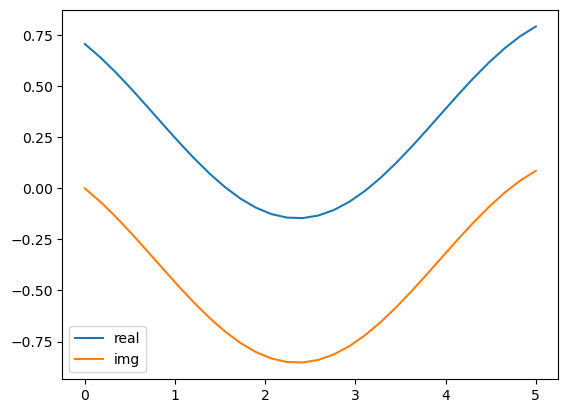

In [38]:
dev = qml.device("default.qubit", wires=1)

def state_preparation(ang):
    qml.Hadamard(wires=0)
    qml.Rot(ang, ang, 0, wires=0)


@qml.qnode(dev)
def state_prep_only(ang=0):
    state_preparation(ang)
    return qml.state()
    
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 30)
y = np.array([state_prep_only(t) for t in x])
print(state_prep_only())
plt.plot(x, np.real(y[:, 0]), label='real')
plt.plot(x, np.imag(y[:, 0]), label='img')
plt.legend()

### RXX decomposition



In [ ]:

qml.pauli_decompose()

### RXZ training.

In [36]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circ(param):
    # qml.pow(qml.PauliX(0)@qml.PauliX(1), param[0], lazy=False)
    ((qml.PauliX(0)@qml.PauliX(1))**param[0])
    
    # return qml.expval(qml.PauliZ(0))
    return qml.state()


In [37]:
init_params = np.array([0.41], requires_grad=True)
print(circ(init_params))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [38]:
qml.matrix((qml.PauliX(0)@qml.PauliX(1))**0.5)

array([[0.5+0.5j, 0. +0.j , 0. +0.j , 0.5-0.5j],
       [0. +0.j , 0.5+0.5j, 0.5-0.5j, 0. +0.j ],
       [0. +0.j , 0.5-0.5j, 0.5+0.5j, 0. +0.j ],
       [0.5-0.5j, 0. +0.j , 0. +0.j , 0.5+0.5j]])